In [0]:
#Imports
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [0]:
#Imporando os dados

data = pd.read_csv("https://raw.githubusercontent.com/jilcimar/data-science/master/deputados/Ano-2018.csv", error_bad_lines=False, sep = ';')
data.head()

,txNomeParlamentar,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
0,ABEL MESQUITA JR.,178957.0,1.0,2015.0,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,AUTO POSTO AEROPORTO LTDA,082.021.160/0011-5,88479,4,2018-02-06T00:00:00,70.00,0.0,70.00,2,2018,0,NaN,NaN,1471159,NaN,NaN,3074,6519085
1,ABEL MESQUITA JR.,178957.0,1.0,2015.0,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,Auto Posto JK Ltda.,034.822.080/0018-2,787829,0,2018-04-02T00:00:00,200.00,0.0,200.00,4,2018,0,NaN,NaN,1497012,NaN,NaN,3074,6586329
2,ABEL MESQUITA JR.,178957.0,1.0,2015.0,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,AUTO POSTO PREMIUM LTDA,153.699.570/0018-7,1310,4,2018-03-05T00:00:00,1492.81,0.0,1492.81,3,2018,0,NaN,NaN,1471173,NaN,NaN,3074,6519234
3,ABEL MESQUITA JR.,178957.0,1.0,2015.0,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,AUTO POSTO PREMIUM LTDA,153.699.570/0018-7,1397,4,2018-04-06T00:00:00,1474.33,0.0,1474.33,3,2018,0,NaN,NaN,1483154,NaN,NaN,3074,6549679
4,ABEL MESQUITA JR.,178957.0,1.0,2015.0,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,AUTO POSTO PREMIUM LTDA - ME,153.699.570/0018-7,1237,4,2018-01-30T00:00:00,1513.82,0.0,1513.82,1,2018,0,NaN,NaN,1463325,NaN,NaN,3074,6498316


In [0]:
# Tratando o Dataset

deputados =  data.drop(columns=['nuCarteiraParlamentar','codLegislatura','numSubCota',
                                  'numEspecificacaoSubCota','indTipoDocumento','nuLegislatura','ideCadastro','ideDocumento'])
deputados.head()

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId
0,ABEL MESQUITA JR.,RR,DEM,COMBUSTÍVEIS E LUBRIFICANTES.,Veículos Automotores,AUTO POSTO AEROPORTO LTDA,082.021.160/0011-5,88479,2018-02-06T00:00:00,70.00,0.0,70.00,2,2018,0,NaN,NaN,1471159,NaN,NaN,3074
1,ABEL MESQUITA JR.,RR,DEM,COMBUSTÍVEIS E LUBRIFICANTES.,Veículos Automotores,Auto Posto JK Ltda.,034.822.080/0018-2,787829,2018-04-02T00:00:00,200.00,0.0,200.00,4,2018,0,NaN,NaN,1497012,NaN,NaN,3074
2,ABEL MESQUITA JR.,RR,DEM,COMBUSTÍVEIS E LUBRIFICANTES.,Veículos Automotores,AUTO POSTO PREMIUM LTDA,153.699.570/0018-7,1310,2018-03-05T00:00:00,1492.81,0.0,1492.81,3,2018,0,NaN,NaN,1471173,NaN,NaN,3074
3,ABEL MESQUITA JR.,RR,DEM,COMBUSTÍVEIS E LUBRIFICANTES.,Veículos Automotores,AUTO POSTO PREMIUM LTDA,153.699.570/0018-7,1397,2018-04-06T00:00:00,1474.33,0.0,1474.33,3,2018,0,NaN,NaN,1483154,NaN,NaN,3074
4,ABEL MESQUITA JR.,RR,DEM,COMBUSTÍVEIS E LUBRIFICANTES.,Veículos Automotores,AUTO POSTO PREMIUM LTDA - ME,153.699.570/0018-7,1237,2018-01-30T00:00:00,1513.82,0.0,1513.82,1,2018,0,NaN,NaN,1463325,NaN,NaN,3074


# ANALISANDO O DATASET
 - Qual categoria mais usada
 - Qual deputado mais gasta
 - Qual a categoria com maior gasto entre os deputados
 - Partido com maior e menor gasto
 - Qual estado os deputados gastam mais

In [0]:
#Agrupando as categorias
categorias = deputados.groupby(['txtDescricao']).count()
print (categorias)

                                                    txNomeParlamentar  ...  nuDeputadoId
txtDescricao                                                           ...              
ASSINATURA DE PUBLICAÇÕES                                         753  ...           753
COMBUSTÍVEIS E LUBRIFICANTES.                                   61424  ...         61424
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.                    2321  ...          2321
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                             8490  ...          8490
Emissão Bilhete Aéreo                                           77244  ...         77244
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                      14053  ...         14053
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO F...               7933  ...          7933
LOCAÇÃO OU FRETAMENTO DE AERONAVES                                225  ...           225
LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES                               42  ...            42
LOCAÇÃO OU FRETAMENTO

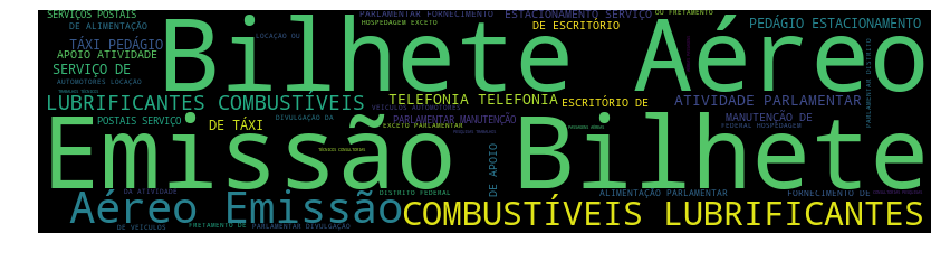

In [0]:
# Exibindo os resultados de forma gráfica
#Gráfico de ocorrência de palavras para representar as categorias mais usadas pelos deputados

words = ""

for search_word in deputados.txtDescricao:
    words = words + " " + search_word

wordcloud = WordCloud(max_font_size=100,width = 800, height = 200).generate(words)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [0]:
categorias = deputados.groupby(['sgPartido']).sum()

print (categorias['vlrDocumento'])


sgPartido
AVANTE           2.482633e+06
DEM              1.690989e+07
MDB              2.075003e+07
PATRI            1.830180e+06
PCdoB            4.577726e+06
PDT              8.248685e+06
PHS              1.819737e+06
PODE             7.367397e+06
PP               1.987436e+07
PPL              4.737300e+05
PPS              3.277559e+06
PR               1.530537e+07
PRB              8.601266e+06
PROS             4.479640e+06
PSB              1.082508e+07
PSC              3.226264e+06
PSD              1.489471e+07
PSDB             1.814179e+07
PSL              2.669910e+06
PSOL             1.876725e+06
PT               2.512387e+07
PTB              7.119428e+06
PV               1.039700e+06
REDE             5.668335e+05
SOLIDARIEDADE    3.625658e+06
Name: vlrDocumento, dtype: float64


In [0]:
#Empresas que mais fornecem serviços

servicos_por_categoria = deputados.groupby(['txtDescricaoEspecificacao']).count()
print(servicos_por_categoria['sgPartido'])

txtDescricaoEspecificacao
Aeronaves                 314
Embarcações                42
Sem especificações         32
Veículos Automotores    60821
Name: sgPartido, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


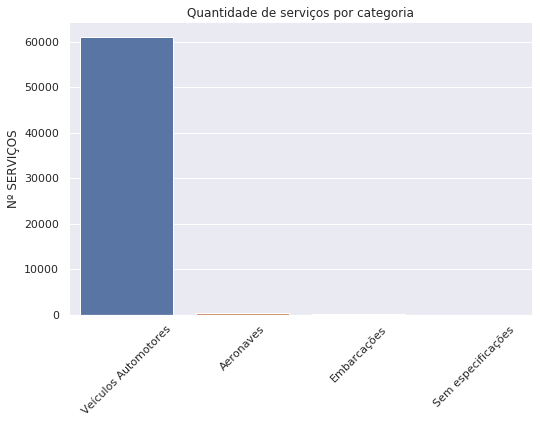

In [0]:
# Exibindo no gráfico os valores
sns.set(font_scale=1)
grafico = sns.factorplot("txtDescricaoEspecificacao", data=deputados, kind="count",size=5, aspect=1.5)
grafico.set_xticklabels(rotation=45)
plt.title('Quantidade de serviços por categoria')
plt.xlabel('')
plt.ylabel('Nº SERVIÇOS')
plt.show()
